### 2. Loading the data and packages
#### 2.1. Importing dependencies

In [21]:
import numpy as np
import seaborn as sns
import datetime as dt
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas_datareader.data as web
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Save Model using Pickle
from pickle import dump
from pickle import load

import yfinance as yfin

#### 2.2. Loading the data

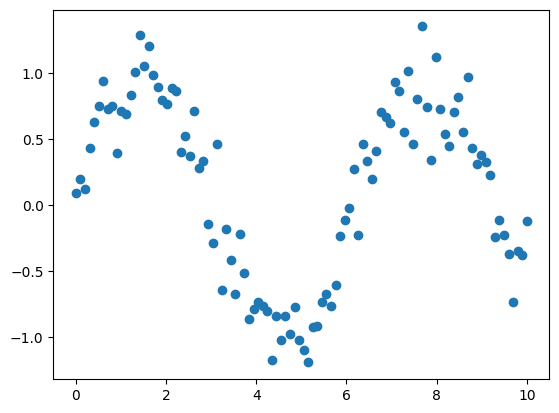

In [22]:
def create_dataset(n):
  x = np.linspace(0, 10, n)
  y = np.sin(x) + np.random.randn(n) * 0.2
  return x, y

X, Y = create_dataset(100)
plt.scatter(X, Y)

### 3. Exploratory data analysis

In [23]:
yfin.pdr_override()

start = dt.datetime(2018, 1, 1)
end = dt.datetime(2022, 3, 28)

stk_tickers = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOG']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.get_data_yahoo(stk_tickers, start, end)
ccy_data = web.get_data_fred(ccy_tickers, start, end)
idx_data = web.get_data_fred(idx_tickers, start, end)
# stk_data = web.DataReader(stk_tickers, 'yahoo', start, end)
# ccy_data = web.DataReader(ccy_tickers, 'fred', start, end)
# idx_data = web.DataReader(idx_tickers, 'fred', start, end)

[*********************100%%**********************]  5 of 5 completed


In [24]:
X_merged = stk_data['Adj Close'].merge(ccy_data, how='inner', left_index=True, right_index=True)
X_data = X_merged.merge(idx_data, how='inner', left_index=True, right_index=True)
X_data.head()

,AAPL,AMZN,GOOG,MSFT,TSLA,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS
2018-01-02,40.776520,59.450500,53.250000,80.391838,21.368668,112.18,1.3596,2695.81,24824.01,9.77
2018-01-03,40.769424,60.209999,54.124001,80.765984,21.150000,112.28,1.3522,2713.06,24922.68,9.15
2018-01-04,40.958801,60.479500,54.320000,81.476830,20.974667,112.78,1.3539,2723.99,25075.13,9.22
2018-01-05,41.425133,61.457001,55.111500,82.487022,21.105333,113.18,1.3562,2743.15,25295.87,9.22
2018-01-08,41.271255,62.343498,55.347000,82.571175,22.427334,113.08,1.3566,2747.71,25283.00,9.52


#### 3.1. Descriptive statistics 

In [25]:
X_data.describe()

,AAPL,AMZN,GOOG,MSFT,TSLA,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1051.000000,1051.000000,1066.000000,1066.000000,1066.000000
mean,86.695291,120.173869,81.782134,176.548552,110.447985,109.388173,1.319345,3351.690244,28453.509972,20.546801
std,43.712713,37.674653,31.769152,74.741906,113.330625,3.056295,0.054296,675.362892,4056.873509,8.813250
min,34.163826,59.450500,48.811001,79.512627,11.931333,102.520000,1.149200,2237.400000,18591.930000,9.150000
25%,47.090771,88.037624,57.323376,106.047466,20.210833,107.275000,1.283450,2806.867500,25402.820000,14.880000
50%,69.429279,99.386250,67.125999,156.624146,36.460667,109.330000,1.314000,3070.765000,26862.235000,18.310000
75%,125.797178,160.045753,103.533125,231.907829,217.778336,111.180000,1.364850,3913.752500,31825.165000,23.350000
max,180.190979,186.570496,150.709000,337.621094,409.970001,122.080000,1.433200,4796.560000,36799.650000,82.690000


#### 3.2. Data visualization

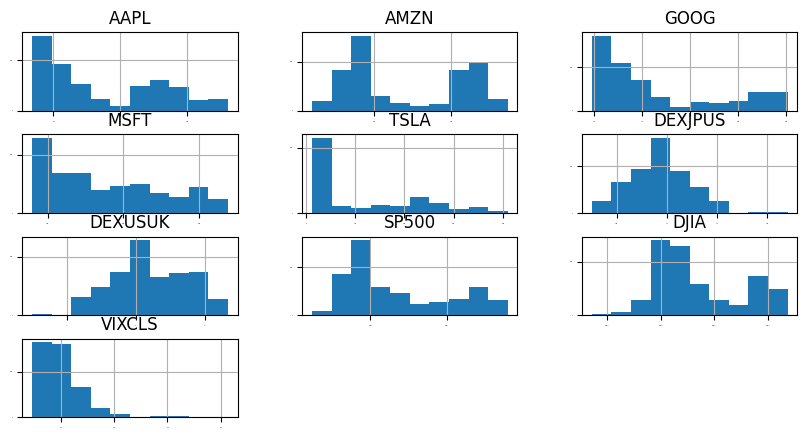

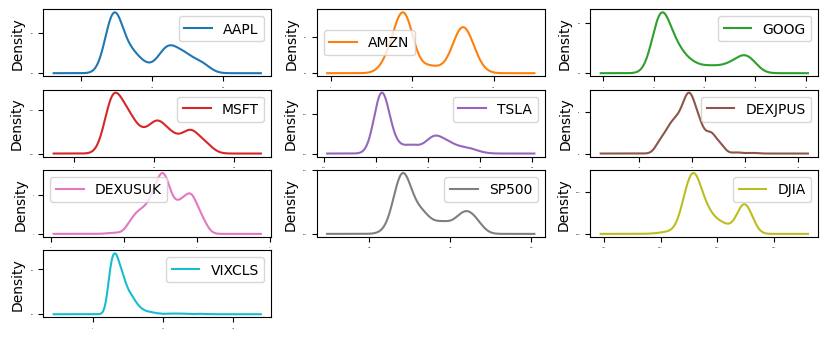

In [26]:
X_data.hist(sharex=False, sharey=False, layout=(4,3), xlabelsize=1, ylabelsize=1, figsize=(10,5))
plt.title('Histogram')
plt.show()

X_data.plot(kind='density', subplots=True, layout=(4,3), sharex=False, legend=True, fontsize=1, figsize=(10,4))
plt.title('Density')
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

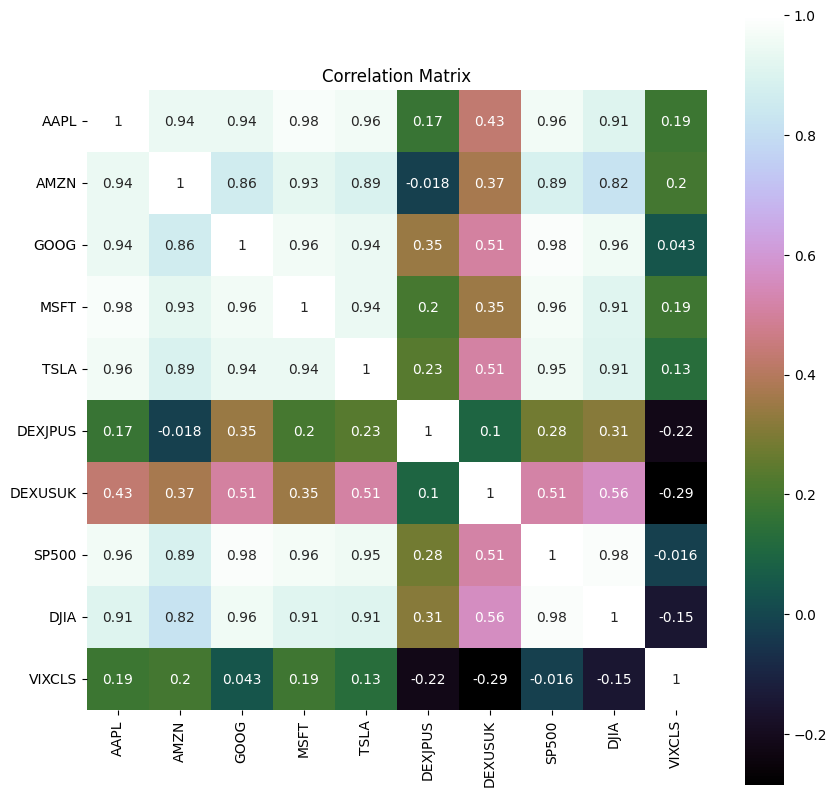

In [27]:
correlation = X_data.corr()
plt.figure(figsize=(10, 10))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap=('cubehelix'))

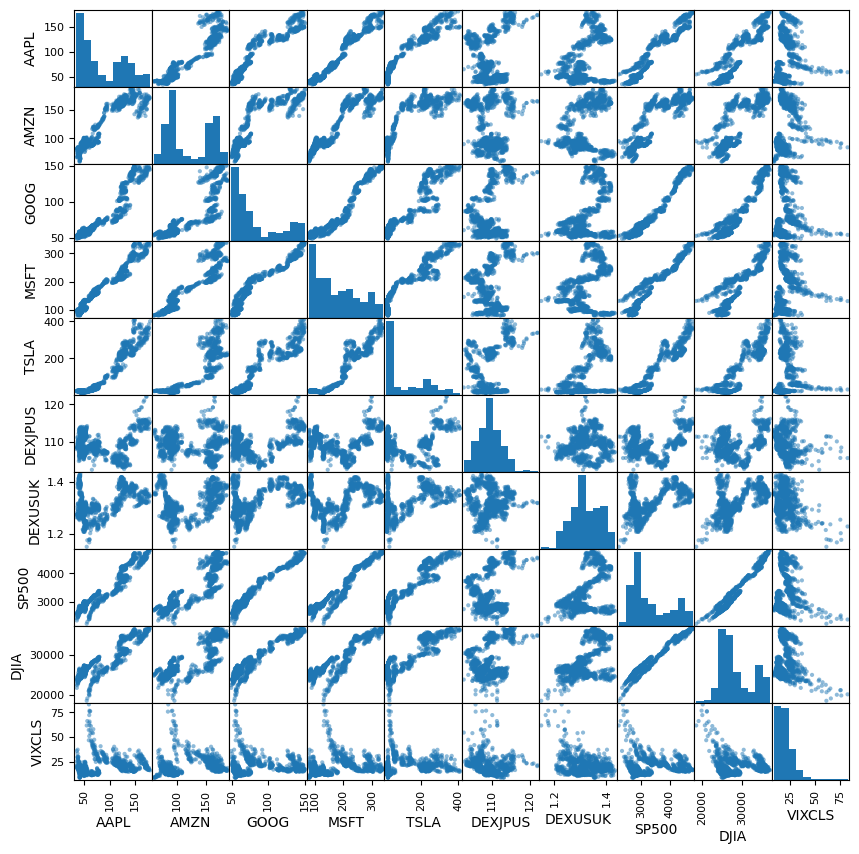

In [28]:
scatter_matrix(X_data, figsize=(10, 10))
plt.show()

### 4. Data preparation
#### 4.1 Data cleaning

In [29]:
X_data.isnull().sum()

AAPL        0
AMZN        0
GOOG        0
MSFT        0
TSLA        0
DEXJPUS    15
DEXUSUK    15
SP500       0
DJIA        0
VIXCLS      0
dtype: int64

#### 3 main options

In [30]:
# Option 1: Dropping "NA" values within data
X_data.dropna(axis=0)

# Option 2: Filling "NA" with 0
X_data.fillna(0)

# Option 3: Filling NAs with the mean of the column
X_data['DEXJPUS'] = X_data['DEXJPUS'].fillna(X_data['DEXJPUS'].mean())
X_data['DEXUSUK'] = X_data['DEXUSUK'].fillna(X_data['DEXUSUK'].mean())

#### 4.2. Feature selection

Discussed in case studies

#### 4.3. Data transformation

3 approaches:
- Rescaling
- Standardization
- Normalization

##### Rescaling

When data comprises attributes with varying scales, many machine learning algorithms can benefit from rescaling all the attributes to the same scale. Attributes are often rescaled in the range between zero and one.

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X_data))
rescaledX.columns = X_data.columns + '_res'
rescaledX.head()

,AAPL_res,AMZN_res,GOOG_res,MSFT_res,TSLA_res,DEXJPUS_res,DEXUSUK_res,SP500_res,DJIA_res,VIXCLS_res
0,0.045284,0.000000,0.043563,0.003406,0.023710,0.493865,0.740845,0.179125,0.342277,0.008431
1,0.045235,0.005975,0.052140,0.004856,0.023160,0.498978,0.714789,0.185866,0.347696,0.000000
2,0.046532,0.008095,0.054064,0.007610,0.022720,0.524540,0.720775,0.190137,0.356069,0.000952
3,0.049726,0.015784,0.061831,0.011524,0.023048,0.544990,0.728873,0.197623,0.368192,0.000952
4,0.048672,0.022758,0.064143,0.011850,0.026369,0.539877,0.730282,0.199405,0.367485,0.005031


##### Standardization

Standardization is a useful technique to transform attributes to a standard normal distribution with a mean of zero and a standard deviation of one.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_data)
StandardisedX = pd.DataFrame(scaler.fit_transform(X_data))
StandardisedX.columns = X_data.columns + '_std'
StandardisedX.head()

,AAPL_std,AMZN_std,GOOG_std,MSFT_std,TSLA_std,DEXJPUS_std,DEXUSUK_std,SP500_std,DJIA_std,VIXCLS_std
0,-1.050960,-1.612540,-0.898530,-1.287121,-0.786382,0.920401,0.747020,-0.971608,-0.895074,-1.223369
1,-1.051123,-1.592371,-0.871006,-1.282112,-0.788312,0.953369,0.609696,-0.946054,-0.870741,-1.293751
2,-1.046788,-1.585214,-0.864833,-1.272597,-0.789860,1.118207,0.641243,-0.929863,-0.833145,-1.285805
3,-1.036115,-1.559256,-0.839908,-1.259075,-0.788706,1.250078,0.683925,-0.901480,-0.778709,-1.285805
4,-1.039637,-1.535715,-0.832491,-1.257949,-0.777036,1.217111,0.691348,-0.894725,-0.781882,-1.251749


##### Normalization

Normalization refers to rescaling each observation (row) to have a length of one (called a unit norm or a vector)

In [34]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_data)
NormalizedX = pd.DataFrame(scaler.fit_transform(X_data))
NormalizedX.columns = X_data.columns + '_norm'
NormalizedX.head()

,AAPL_norm,AMZN_norm,GOOG_norm,MSFT_norm,TSLA_norm,DEXJPUS_norm,DEXUSUK_norm,SP500_norm,DJIA_norm,VIXCLS_norm
0,0.001633,0.002381,0.002133,0.003219,0.000856,0.004492,0.000054,0.107960,0.994133,0.000391
1,0.001626,0.002402,0.002159,0.003222,0.000844,0.004479,0.000054,0.108217,0.994105,0.000365
2,0.001624,0.002398,0.002154,0.003230,0.000832,0.004471,0.000054,0.107995,0.994129,0.000366
3,0.001628,0.002415,0.002166,0.003242,0.000829,0.004448,0.000053,0.107808,0.994149,0.000362
4,0.001623,0.002451,0.002176,0.003247,0.000882,0.004446,0.000053,0.108040,0.994124,0.000374


### 5. Evaluate models

#### 5.1. Test-Train Split

In [35]:
# split out validation dataset for the end
validation_size = 0.2
seed = 1

# transforming the data to include another axis
X = X[:, np.newaxis]
Y = Y[:, np.newaxis]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

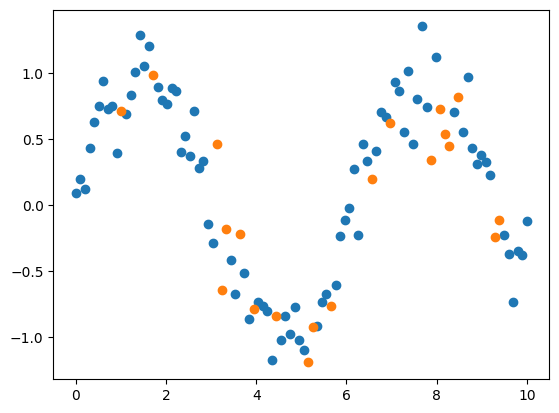

In [36]:
plt.scatter(X_train, Y_train)
plt.scatter(X_test, Y_test)

#### 5.2. Identify Evaluation Metrics

We will evaluate algorithms using the Root Mean Squared Error (RMSE) metric, which is one of the measures of the model performance. RMSE will give a gross idea of how wrong all predictions are (zero is perfect):

#### 5.3. Compare models and algorithms

In [37]:
# first test Linear Regression
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)
rmse_lin = np.sqrt(mean_squared_error(Y_train, Y_pred))
r2_lin = r2_score(Y_train, Y_pred)
print("RMSE for Linear Regression:", rmse_lin)

# second test Polynomial Fit
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
Y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(Y_train, Y_poly_pred))
r2 = r2_score(Y_train, Y_poly_pred)
print("RMSE for Polynomial Regression:", rmse)

RMSE for Linear Regression: 0.6697133333487088
RMSE for Polynomial Regression: 0.626000788554056
